# Free Wavepacket as Present Evolution Check

This notebook lets a Gaussian packet propagate freely and compares predicted $|\psi|^2$ with sampled detector events over time. The exercise demonstrates that even in unbound motion the conservation laws and probability forecasts are checked in the present tense. It reinforces the thesis that models earn meaning only by matching the correlations we can register now.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from wavefunction_now.solver import SplitStepSimulator
from wavefunction_now.measurement import (
    born_probability,
    chi_squared_gof,
    ks_goodness_of_fit,
    sample_measurements,
)

In [2]:
sim = SplitStepSimulator(grid_points=1024, length=40.0)
psi0 = sim.gaussian_wavepacket(sim.x, x0=-8.0, p0=3.0, sigma=1.0)

# Propagate the packet so it spreads and drifts across the grid.
psi_t = sim.evolve(psi0, potential=np.zeros_like(sim.x), dt=0.01, steps=600)
prob_density = born_probability(psi_t)

In [3]:
bin_edges = np.linspace(sim.x.min(), sim.x.max(), 161)
bin_centres = 0.5 * (bin_edges[:-1] + bin_edges[1:])
expected_prob = sim.bin_probabilities(psi_t, bin_edges)

rng = np.random.default_rng(10)
samples = sample_measurements(expected_prob, size=30000, rng=rng)
counts = np.bincount(samples, minlength=expected_prob.size)

chi2_stat, chi2_p = chi_squared_gof(expected_prob, counts)
ks_stat, ks_p = ks_goodness_of_fit(expected_prob, samples)

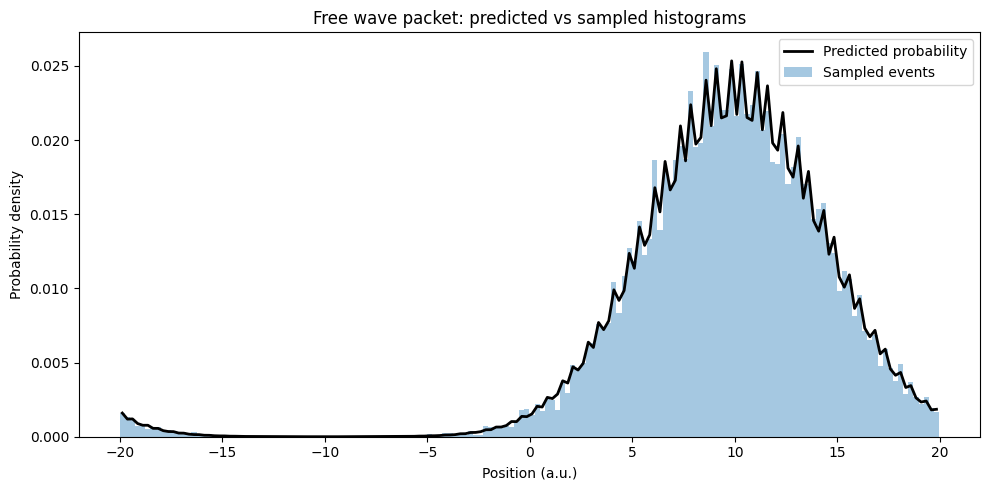

Chi-squared statistic: 201.522, p-value: 0.013
KS statistic: 0.005, p-value: 0.224


In [4]:
plt.figure(figsize=(10, 5))
plt.bar(bin_centres, counts / counts.sum(), width=np.diff(bin_edges), alpha=0.4, label='Sampled events')
plt.plot(bin_centres, expected_prob, color='black', linewidth=2, label='Predicted probability')
plt.xlabel('Position (a.u.)')
plt.ylabel('Probability density')
plt.title('Free wave packet: predicted vs sampled histograms')
plt.legend()
plt.tight_layout()
plt.show()

print(f'Chi-squared statistic: {chi2_stat:.3f}, p-value: {chi2_p:.3f}')
print(f'KS statistic: {ks_stat:.3f}, p-value: {ks_p:.3f}')

The strong agreement between the tests and the overlaid histogram shows that the evolving packet remains a faithful map of the detector correlations.